# Do the hello world example on a 2-qubit bell state

## Step1 : Map the problem to circuits and operators

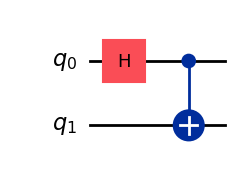

In [3]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.draw(output='mpl')



In [4]:
from qiskit.quantum_info import Pauli

ZZ = Pauli("ZZ")
ZI = Pauli("ZI")
IZ = Pauli("IZ")
XX = Pauli("XX")
XI = Pauli("XI")
IX = Pauli("IX")

observables = [ZZ,ZI,IZ,XX,XI,IX]



# Step2: Optimize

# Step3: Execute on the backend

In [5]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc]*len(observables),observables )

job.result()

EstimatorResult(values=array([1.        , 0.03515625, 0.03515625, 1.        , 0.        ,
       0.        ]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.4791283, 'sample_measure_time': 0.0084874, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 16057, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9987640380859375, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.4791283, 'sample_measure_time': 0.0084874, 'i

# Step4: Post-process (and plotting)

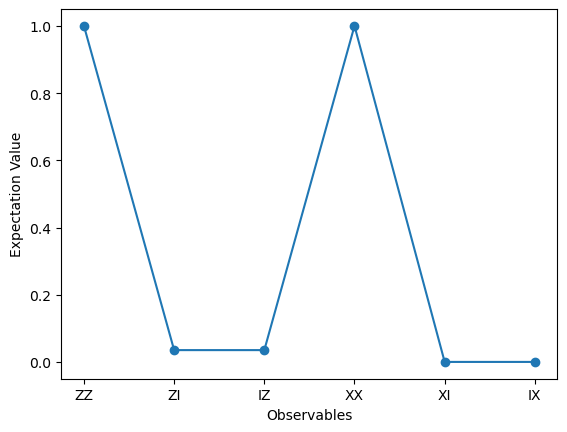

In [6]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI','IX' ]
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation Value')
plt.show()

## Extend the Hello world to an $n$-qubit GHZ state

# Step1: Map the problem to circuits and operators

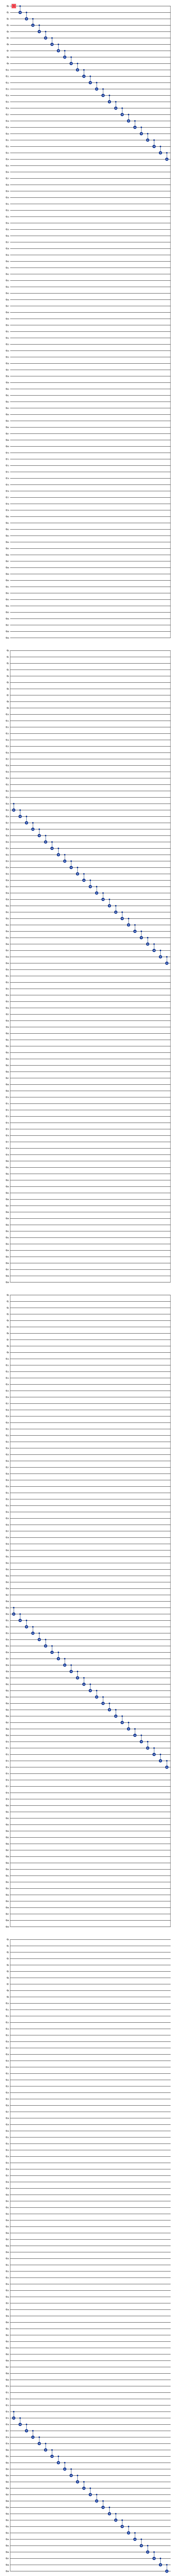

In [7]:
def get_qc_for_n_qubit_GHZ_states(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i,i+1)
    return qc

n = 100
qc = get_qc_for_n_qubit_GHZ_states(n)
qc.draw(output="mpl")


In [8]:
from qiskit.quantum_info import SparsePauliOp

operator_strings =  ['Z'+'I'*i +'Z'+'I'*(n-2-i) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_strings) for operator_strings in operator_strings]



['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

## Step2: Optimize the problem for quantum execution

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager 


backend_name = "ibm_brisbane"
backend = QiskitRuntimeService().backend(backend_name)
pass_manager = generate_preset_pass_manager(optimization_level=1,backend = backend)

qc_transpiled = pass_manager.run(qc)
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]


## Step3: Execute on the backend

In [10]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator 
from qiskit_ibm_runtime import EstimatorOptions

options = EstimatorOptions()
options.resilience_level = 1

options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

estimator = Estimator(backend, options = options)
job = estimator.run([(qc_transpiled,operators_transpiled_list)] )
job_id = job.job_id()
print(job_id)


czmevyztj3e0008jwpmg


## Step4: Post-address and plot

In [11]:
job_id = 'cymt3sq9b62g0082xdvg'
service = QiskitRuntimeService()
job = service.job(job_id)

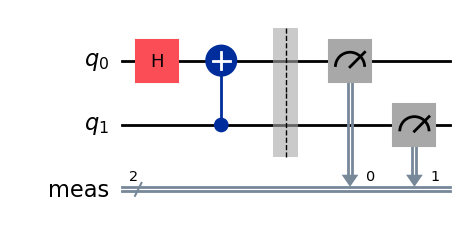

In [12]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)     # Hadamard on qubit 0
qc.cx(1,0)  # CNOT (q0 -> q1)
qc.measure_all()  # Measure both qubits
qc.draw(output='mpl')


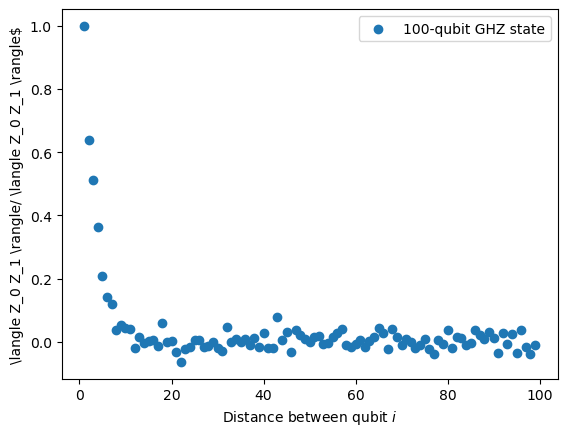

In [13]:
import matplotlib.pyplot as plt

data = list(range(1,len(operators)+1))
result = job.result()[0]
values = result.data.evs
values = [v/values [0] for v in values]

plt.scatter(data,values, marker ='o', label = '100-qubit GHZ state')
plt.xlabel('Distance between qubit $i$')
plt.ylabel(r'\langle Z_0 Z_1 \rangle/ \langle Z_0 Z_1 \rangle$')
plt.legend()
plt.show()